In [1]:
"""
Northeastern University - College of Professional Studies
ALY6983 ST: Python for Data Science
Capstone Project
Instructor: Joel Schwartz
Written by: Snehal Dahiphale
2nd July 2018
Python Version: 3.6

"""


"""
Steps before running:
Import all the functions and packages listed above the main code.

Note: 
'Quandl' will run limited times a day. Following error indicates that you must restart kernel before running the 
code.

Error:
You have exceeded the anonymous user limit of 50 calls per day. 
To make more calls today, please register for a free Quandl account and then include your API key with your requests.

"""


"""
In this Capstone Project, I have implemented a linear regression on stock market data of Apple (APPL) taken from quandl.com
using package quandl.Linear Regression plots tell us that the variance in price according to the past data of stocks. 
I have divided this work into 4 functions:
1) data(): imports stock information from quandl.com using quandl.
2) data_preprocess(): converts prices and dates to a list followed by one dimensional vector.
3) data_analysis(): Defines independent variable object and visualizes time vs price.
4) data_prediction(): Predicts price on a specific date by splitting data between train and test.

"""

'\nIn this Capstone Project, I have implemented a linear regression on stock market data of Apple (APPL) taken from quandl.com\nusing package quandl.Linear Regression plots tell us that the variance in price according to the past data of stocks. \nI have divided this work into 4 functions:\n1) data(): imports stock information from quandl.com using quandl.\n2) data_preprocess(): converts prices and dates to a list followed by one dimensional vector.\n3) data_analysis(): Defines independent variable object and visualizes time vs price.\n4) data_prediction(): Predicts price on a specific date by splitting data between train and test.\n\n'

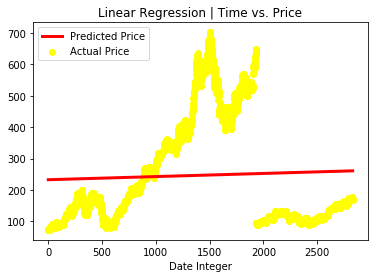

233.02267211947614 0.00999046439621321 232.922767475514


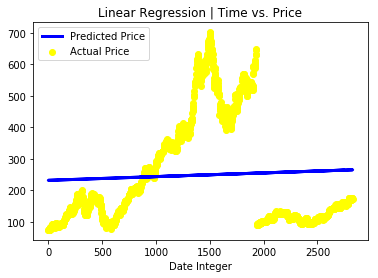

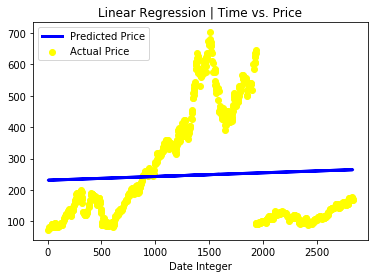

In [3]:
import quandl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def data():
    """
    Downloads Stock from Quandl.
    Computes daily Returns based on Adj Close.
    Returns pandas dataframe.
    
    """
    # Get data using Quandl
    df = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2018-01-01")
    df = df.reset_index()
    return df

def data_preprocess():
    """
    Operates on two columns of dataframe:
    1) Stores given 'Close' to a list 'prices'
    2) Stores given 'Date' to a list 'dates'
    Converts lists 'prices' and 'dates' to one dimensional vector.
    
    """
    df = data()
    
    # Store prices and dates in a list
    prices = df['Close'].tolist()
    dates = df.index.tolist()
    
    # Convert to 1d Vector
    dates = np.reshape(dates, (len(dates), 1))
    prices = np.reshape(prices, (len(prices), 1))
    
    return [dates,prices]

def data_analysis():
    """
    Applies Linear Regression on 'dates' and 'prices' from dataframe df.
    Plots linear regression between time vs price.
    
    """
    dates,prices = data_preprocess() 
    
    # Define Linear Regressor or independent variable object
    regressor = LinearRegression()
    regressor.fit(dates, prices)

    # Visualize Results
    plt.scatter(dates, prices, color='yellow', label='Actual Price')
    plt.plot(dates, regressor.predict(dates), color='red', linewidth=3, label='Predicted Price')
    plt.title('Linear Regression | Time vs. Price')
    plt.legend()
    plt.xlabel('Date Integer')
    plt.show()
    
    # Return regressor, dates and prices
    return [regressor,dates,prices]


def data_prediction():
    """
    Predict price on a specific date.
    Splits data into train and test.
    Applies linear regression and plots time vs price.
    
    """
    regressor, dates, prices = data_analysis()
    
    # Predict Price on Given Date
    date = 10
    predicted_price = regressor.predict(date)
    print(predicted_price[0][0], regressor.coef_[0][0], regressor.intercept_[0])

    # Split data into train and test
    xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size=0.33, random_state=42)
    regressor.fit(xtrain, ytrain)

    # Train Set Graph
    plt.scatter(xtrain, ytrain, color='yellow', label='Actual Price')
    plt.plot(xtrain, regressor.predict(xtrain), color='blue', linewidth=3,
             label='Predicted Price')
    plt.title('Linear Regression | Time vs. Price')
    plt.legend()
    plt.xlabel('Date Integer')
    plt.show()

    # Test Set Graph
    plt.scatter(xtest, ytest, color='yellow', label='Actual Price')
    plt.plot(xtest, regressor.predict(xtest), color='blue', linewidth=3,
             label='Predicted Price')
    plt.title('Linear Regression | Time vs. Price')
    plt.legend()
    plt.xlabel('Date Integer')
    plt.show()
    
data_prediction()
